In [ ]:
#SHHHHHHHHHHHHHHHHH
client_id = 'client_id'
client_secret = 'secret_key'



Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import torchvision

from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

Data + Cleaning



In [ ]:
#Defining the class of the dataset
class ProjectDataSet(Dataset):
  def __init__(self, file, transform=None):

    url = file
    data = pd.read_csv(url)
    features = data.columns[6:-3]
    
    X = MinMaxScaler().fit_transform(data[features])
    #print(X)
    Y = data['mood']
    encoder = LabelEncoder()
    encoder.fit(Y)
    Y = encoder.transform(Y)
    self.transform = transform

    self.X = torch.tensor(X, dtype=float)
    self.Y = torch.tensor(Y)
  
    if self.transform:
      self.X = self.transform(self.X)
      #self.Y = self.transform(self.Y)
  def __len__(self):
    return len(self.Y)

  def __getitem__(self, id):
    return self.X[id], self.Y[id]


In [ ]:
#Data Augmentation

class AddNoise(nn.Module):
  def __init__(self, scale=0.1):
    super().__init__()
    self.scale = scale
  def forward(self, tensor):
    tensor = tensor + (torch.rand_like(tensor)*self.scale)
    return tensor 

Models

In [ ]:
class TestModel(nn.Module):
  def __init__(self, ninputs=10, nhidden=8,nout=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(ninputs, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nout),
            nn.Softmax(dim=-1),)
  def forward(self, x):
    out = self.net(x)
    return out

In [ ]:
#Basic Model

class BasicModel(nn.Module):
    def __init__(self,
                 ninputs=10,
                 nhidden=512,
                 nout=4,
                ):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(ninputs, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nhidden),
            nn.ReLU(),
            nn.Linear(nhidden, nout),
            nn.Softmax(dim=-1),

        )
    def forward(self, x):
        out = self.net(x)
        return out

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

Training

In [ ]:
transform=transforms.Compose([AddNoise()])

In [ ]:
train_dataset = ProjectDataSet('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv', transform=transform)
test_dataset = ProjectDataSet('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size =200)



Initial Basic Test

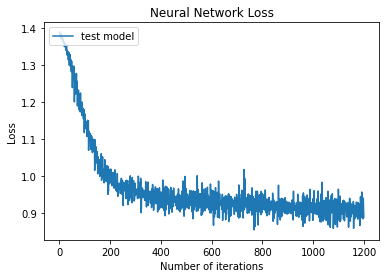

Total accuracy of model = 83.82%


In [ ]:
model_t = TestModel()

loss_function = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model_t.parameters(), lr=0.005)
epochs = 300

loss_history_t = []
for i in range(epochs):
  for data, label in train_loader:
    data=data.float()#.to(device)
    output = model_t(data)

    loss = loss_function(output, label)
    optim.zero_grad()
    loss.backward()

    optim.step()

    loss_history_t.append(loss.item())

plt.plot(loss_history_t, label="test model")
plt.legend(loc="upper left")
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


model_t.eval()
accuracy = 0
for (data, label) in test_loader:
    data = data.float()
    label = label
    out = model_t(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy of model = {accuracy / len(test_dataset)*100:.2f}%")  

In [ ]:
import time

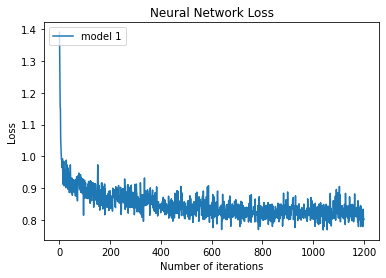

Total accuracy of model = 89.94%
Amount of time with cpu: 14.644575834274292


In [ ]:
#first basic model

model = BasicModel().to(device)

loss_function = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model.parameters(), lr=0.005)
epochs = 300

start = time.time()
loss_history = []
for i in range(epochs):
  for data, label in train_loader:
    data=data.float().to(device)
    label = label.to(device)
    output = model(data)

    loss = loss_function(output, label)
    optim.zero_grad()
    loss.backward()

    optim.step()

    loss_history.append(loss.item())

plt.plot(loss_history, label="model 1")
plt.legend(loc="upper left")
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


model.eval()
accuracy = 0
for (data, label) in test_loader:
    data = data.float().to(device)
    label = label.to(device)
    out = model(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy of model = {accuracy / len(test_dataset)*100:.2f}%")  
end = time.time()
print("Amount of time with " + str(device) + ": " + str(end - start))

In [ ]:
test_dataset = ProjectDataSet('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv', transform=transform)
train_dataset = ProjectDataSet('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size =200)


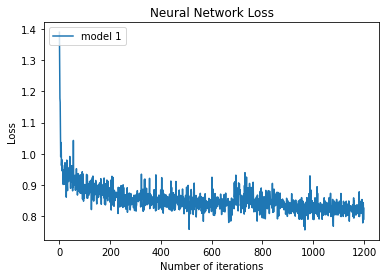

Total accuracy of model = 88.92%


In [ ]:
model_u = BasicModel()

loss_function = nn.CrossEntropyLoss()
optim = torch.optim.AdamW(model_u.parameters(), lr=0.005)
epochs = 300

loss_history = []
for i in range(epochs):
  for data, label in train_loader:
    data=data.float()#.to(device)
    output = model_u(data)

    loss = loss_function(output, label)
    optim.zero_grad()
    loss.backward()

    optim.step()

    loss_history.append(loss.item())

plt.plot(loss_history, label="model 1")
plt.legend(loc="upper left")
plt.title("Neural Network Loss")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()


model_u.eval()
accuracy = 0
for (data, label) in test_loader:
    data = data.float()
    label = label
    out = model_u(data)
    answers = out.max(dim=1)[1]
    accuracy += (answers == label).sum()
print(f"Total accuracy of model = {accuracy / len(test_dataset)*100:.2f}%")  

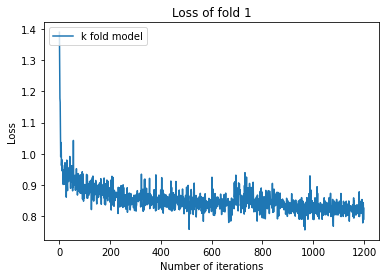

Accuracy for fold 1 = 84.06%


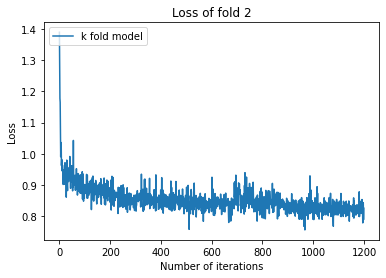

Accuracy for fold 2 = 78.26%


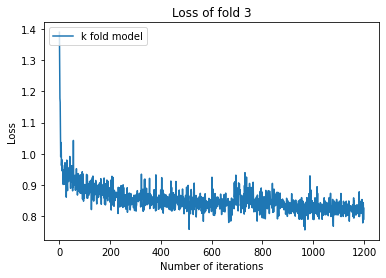

Accuracy for fold 3 = 81.75%


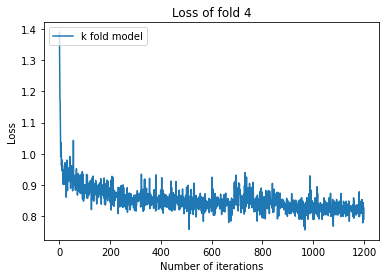

Accuracy for fold 4 = 83.21%


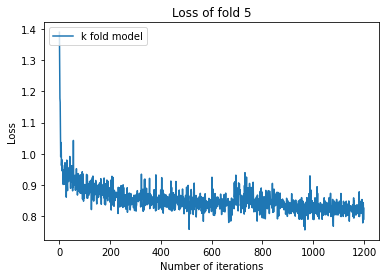

Accuracy for fold 5 = 78.83%


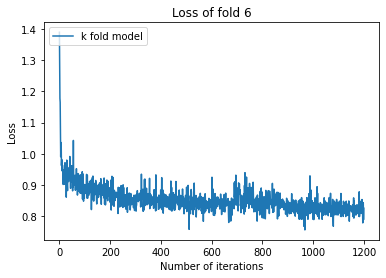

Accuracy for fold 6 = 81.75%


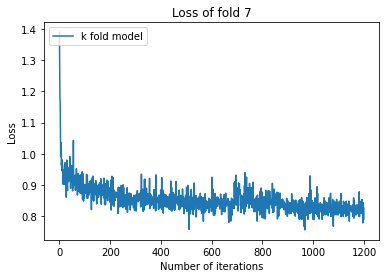

Accuracy for fold 7 = 83.21%


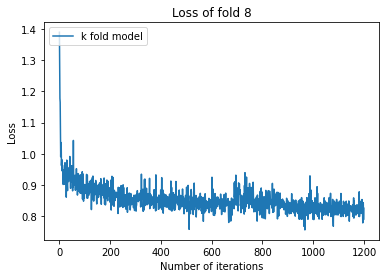

Accuracy for fold 8 = 75.18%


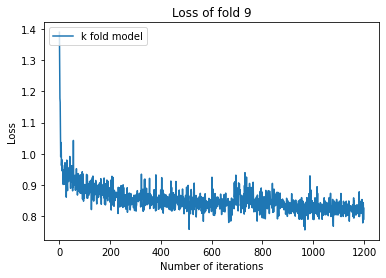

Accuracy for fold 9 = 77.37%


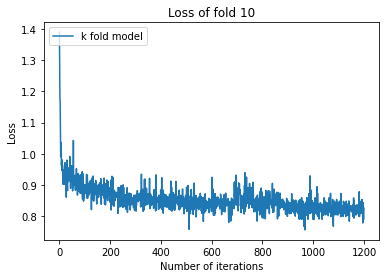

Accuracy for fold 10 = 78.83%
average accuracy: 80.25%


In [ ]:
#kfold
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset

k_folds = 10

results = {}

#Reset weights of a model
def reset_weights(m):
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()


epochs = 50
loss_function = nn.CrossEntropyLoss()

kfold = KFold(n_splits=k_folds, shuffle=True)

big_data = ConcatDataset([test_dataset, train_dataset])
#big_data = train_dataset
avg_acc = 0

for fold, (train_ids, test_ids) in enumerate(kfold.split(big_data)):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      big_data, 
                      batch_size=200, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      big_data,
                      batch_size=200, sampler=test_subsampler)

    k_model = BasicModel()
    k_model.apply(reset_weights)
    optimizer = torch.optim.AdamW(k_model.parameters(), lr=1e-4)
    local_loss= []
    for epoch in range(epochs):
      for features, label in trainloader:
        optimizer.zero_grad()
        output = k_model(features.float())
        loss = loss_function(output,label)
        loss.backward()
        optimizer.step()
        local_loss.append(loss.item())

    plt.plot(loss_history, label="k fold model")
    plt.legend(loc="upper left")
    plt.title("Loss of fold " + str(fold + 1))
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show()

    k_model.eval()
    accuracy = 0
    fold_acc = 0
    for (data, label) in testloader:
        data = data.float()
        label = label
        out = k_model(data)
        answers = out.max(dim=1)[1]
        accuracy += (answers == label).sum()
        fold_acc = accuracy / len(test_subsampler)
    print("Accuracy for fold " + str(fold + 1) + f" = {(fold_acc)*100:.2f}%")
    avg_acc += fold_acc
print(f"average accuracy: {(avg_acc/k_folds)*100:.2f}%")

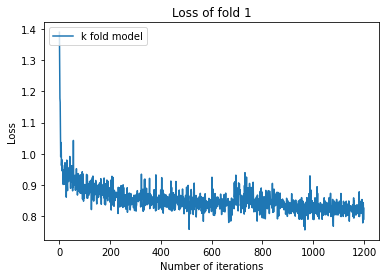

Accuracy for fold 1 = 45.65%


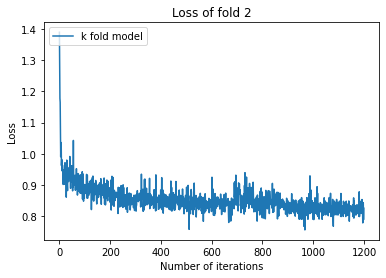

Accuracy for fold 2 = 38.41%


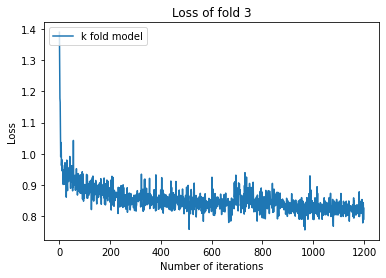

Accuracy for fold 3 = 25.55%


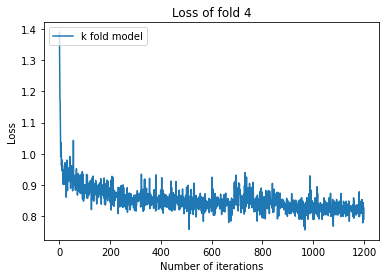

Accuracy for fold 4 = 23.36%


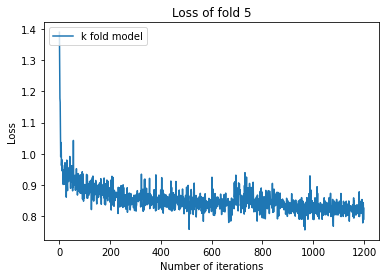

Accuracy for fold 5 = 54.74%


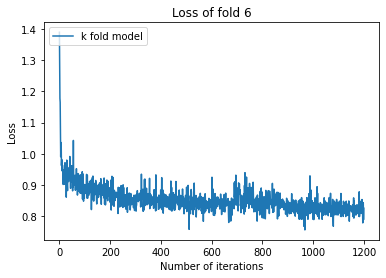

Accuracy for fold 6 = 48.91%


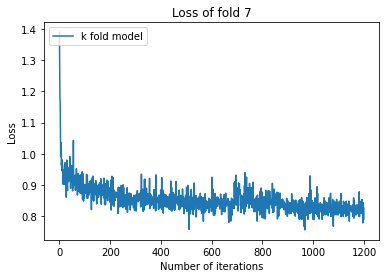

Accuracy for fold 7 = 48.18%


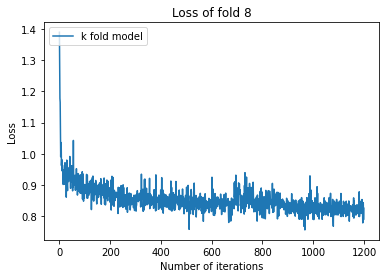

Accuracy for fold 8 = 52.55%


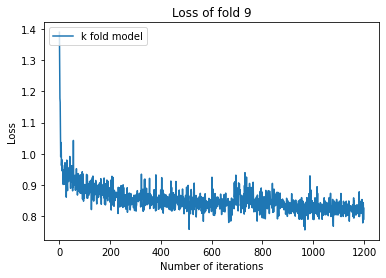

Accuracy for fold 9 = 34.31%


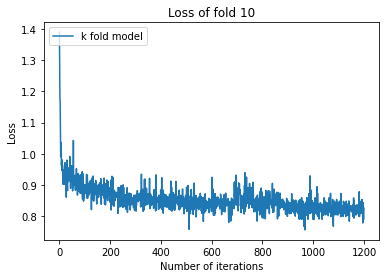

Accuracy for fold 10 = 46.72%
average accuracy: 41.84%


In [ ]:
#kfold
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset

k_folds = 10

results = {}

#Reset weights of a model
def reset_weights(m):
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    layer.reset_parameters()


epochs = 100
loss_function = nn.CrossEntropyLoss()

kfold = KFold(n_splits=k_folds, shuffle=True)

big_data = ConcatDataset([test_dataset, train_dataset])

avg_acc = 0

for fold, (train_ids, test_ids) in enumerate(kfold.split(big_data)):
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      big_data, 
                      batch_size=200, sampler=train_subsampler)
    testloader = torch.utils.data.DataLoader(
                      big_data,
                      batch_size=200, sampler=test_subsampler)

    t_model = TestModel()
    t_model.apply(reset_weights)
    optimizer = torch.optim.AdamW(t_model.parameters(), lr=1e-4)
    local_loss= []
    for epoch in range(epochs):
      for features, label in trainloader:
        optimizer.zero_grad()
        output = t_model(features.float())
        loss = loss_function(output,label)
        loss.backward()
        optimizer.step()
        local_loss.append(loss.item())

    plt.plot(loss_history, label="k fold model")
    plt.legend(loc="upper left")
    plt.title("Loss of fold " + str(fold + 1))
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show()

    t_model.eval()
    accuracy = 0
    fold_acc = 0
    for (data, label) in testloader:
        data = data.float()
        label = label
        out = t_model(data)
        answers = out.max(dim=1)[1]
        accuracy += (answers == label).sum()
        fold_acc = accuracy / len(test_subsampler)
    print("Accuracy for fold " + str(fold + 1) + f" = {(fold_acc)*100:.2f}%")
    avg_acc += fold_acc
print(f"average accuracy: {(avg_acc/k_folds)*100:.2f}%")

In [ ]:
!pip install spotipy --upgrade



     |████████████████████████████████| 138 kB 9.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy import SpotifyClientCredentials
from numpy import random
import requests

manager = SpotifyClientCredentials(client_id,client_secret)

sp = spotipy.Spotify(client_credentials_manager=manager)

def get_songs_features(ids):

  meta = sp.track(ids)
  features = sp.audio_features(ids)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']
  ids =  meta['id']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  valence = features[0]['valence']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  key = features[0]['key']
  time_signature = features[0]['time_signature']

  track = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
          energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
  columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
              'liveness','valence','loudness','speechiness','tempo','key','time_signature']
  return track,columns


def getRandomSearch():
  characters = 'abcdefghijklmnopqrstuvwxyz'
  r = random.rand() * 26
  index = int(np.floor(r))
  randomCharacter = characters[index]
  randomSearch = randomCharacter + '%'
  if int(np.round(random.rand())) == 1:
    randomSearch = "%" + randomSearch
  return randomSearch



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')
#Getting min and max of the features
feature_set = df.columns[6:-3]
max_set = df[feature_set].max()
min_set = df[feature_set].min()
#Getting and encoding y
Y = df['mood']
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)

In [ ]:
def predict_mood(id_song, model):
  preds = get_songs_features(id_song)

  pred = np.array(preds[0][6:-2])
  for i in range(len(pred)):
    pred[i] = (pred[i] - min_set[i])/(max_set[i] - min_set[i])
  final_pred = pred.reshape(-1,1).T
  features = torch.tensor(final_pred, dtype=float)
  features = features.float()
  output = model(features)
  output = output.detach().numpy()
  mood = np.array(target['mood'][target['encode'] == np.where(output == np.max(output))[1][0]])
  #name_song = preds[0][0]
  #artist = preds[0][2]

  #print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
  return mood

In [ ]:
#Random Generation

def rsongs(id_song, model):
  mood = predict_mood(id_song, model)
  song_list = []

  while(len(song_list) < 5):
    randomOffset = int(np.floor(random.rand() * 100))
    song = sp.search(q=getRandomSearch(), limit=1, offset=randomOffset,type='track')
    id = song["tracks"]["items"][0]["id"]
    song_name = song["tracks"]["items"][0]["name"]
    name = song["tracks"]["items"][0]["artists"][0]["name"]

    if(predict_mood(id, model) == mood):
      song_list.append([song_name, name, id])
  return song_list



In [ ]:
#This is the recommendation system.
#1. Copy and paste the url of the song to the 'url' variable. Make sure it's a string.
#2. Run this cell.

# url = 'https://open.spotify.com/track/46HNZY1i7O6jwTA7Slo2PI?si=18f3e62cc49e4231'
url = 'https://open.spotify.com/track/77Ft1RJngppZlq59B6uP0z?si=7f3c39dee18d419a' #Lose Yourself, by Eminem
if len(url) > 22:
  url = url[31:53]



song_list = rsongs(url, k_model)
for song, artist, link in song_list:
  print(song + " by " + artist +". LINK: https://open.spotify.com/track/" + link)

Freaky Deaky by Tyga. LINK: https://open.spotify.com/track/3vySEUpD0tc801F2WZDLYw
505 by Arctic Monkeys. LINK: https://open.spotify.com/track/58ge6dfP91o9oXMzq3XkIS
Tunnel Vision by Kodak Black. LINK: https://open.spotify.com/track/4Q3N4Ct4zCuIHuZ65E3BD4
'Til You Can't by Cody Johnson. LINK: https://open.spotify.com/track/4k3lPl8YTKuY8c1HelVnm3
When It Rains It Pours by Luke Combs. LINK: https://open.spotify.com/track/1mMLMZYXkMueg65jRRWG1l
